# **PART-1, COMPARISION BETWEEN ANALYTICAL AND NUMERICAL**


*******************************INPUT*******************************
1D Steady State Heat Conduction in a rod without heat generation

------------------------------------------------------------------
Please make sure all the inputs are in SI units

----------------------------------------------------------------

Temperature in Kelvin
Length in meters
----------------------------------------------------------------

Please enter the Boundary conditions:
length of the rod: 1
Number of grid points: 30
Temperature of left face: 300
Temperature of right face: 400

*******************************OUTPUT*******************************

 Number of iterations in Gauss-siedel method : 1122

 Number of iterations in Jacobi method : 2145 



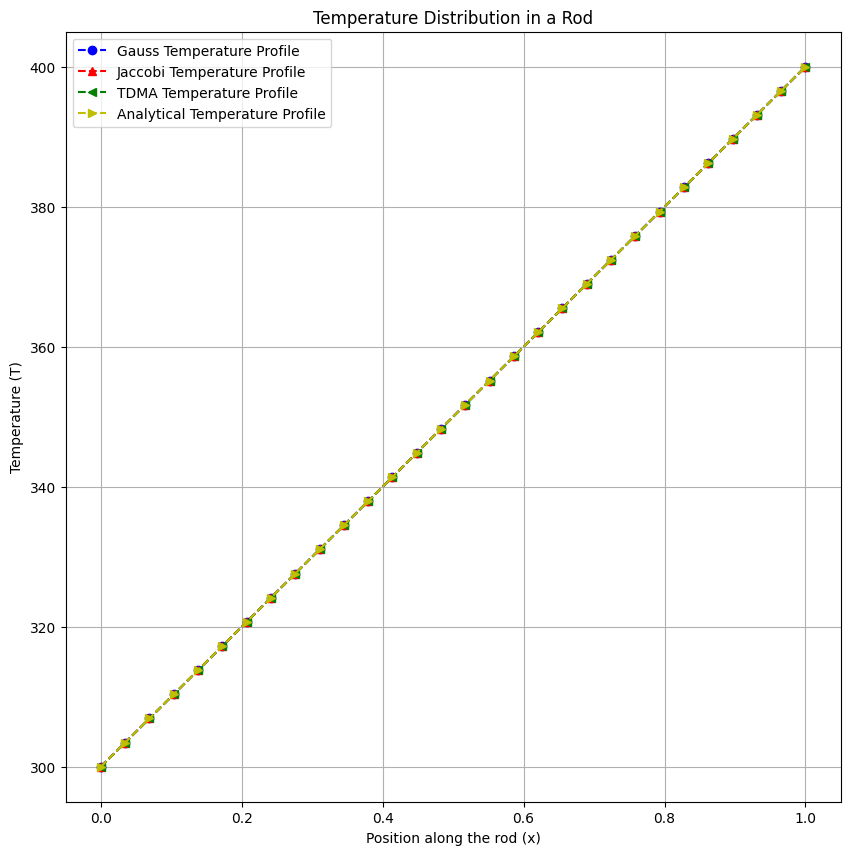

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#absolute function
def Absolute(A):
  for i in range(0,N):
    if A>0:
      A=A
    else:
      A=-1*A
  return A

#maximum error function
def Maximum_error(A,B):
  if B<A:
    B=A
  return B

#defining gauss siedel as a function
#start of gauss
def Gauss_Siedel(A,B,C):
  T=np.zeros(A)
  G_old=np.zeros(A)
  E=np.zeros(A)
  G=np.zeros(A)

  G[0]=B
  G[-1]=C

  M_e=1
  tolerance=0.00001
  count=0
  while M_e>tolerance:
    M_e=0
    for i in range(1,A-1):
      G[i]=0.5*(G[i+1]+G[i-1])
      E[i]=G[i]-G_old[i]
      E[i]=Absolute(E[i])
      M_e=Maximum_error(E[i],M_e)
    G_old[:]=G[:]
    count=count+1
  return G_old[:],count
#end of gauss

#defining Jaccobian as a function
#start of jaccobi
def Jaccobian(A,B,C):
  T=np.zeros(A)
  E=np.zeros(A)
  G=np.zeros(A)

  G[0]=B
  G[-1]=C
  T[0]=B
  T[-1]=C

  M_e=1
  tolerance=0.00001
  count=0
  while M_e>tolerance:
    M_e=0
    for i in range(1,A-1):
      T[i]=0.5*(G[i+1]+G[i-1])
      E[i]=G[i]-T[i]
      E[i]=Absolute(E[i])
      M_e=Maximum_error(E[i],M_e)
    G[:]=T[:]
    count=count+1
  return G[:],count
#end of jaccobi

#defining TDMA as a function
#start of TDMA
def TDMA(A,B,C):
  R=np.zeros(A)
  P=np.zeros(A)
  Q=np.zeros(A)
  F=np.zeros(A)
  D=np.zeros((A,A))

  R[0]=B
  R[-1]=C
  F[0]=B
  F[-1]=C

#creating a tridiagonal matrix D from 2nd row to (n-1)th row beacuse we are using dirichlet boundary condition
  for i in range(1,A-1):
    for j in range(0,A):
      if i==j:
        D[i,j]=-2
      elif j==i+1:
        D[i,j]=1
      elif j==i-1:
        D[i,j]=1

#initialising 1st row 1st element and last row last element with one to satisfy LHS=RHS
  D[0,0]=1
  D[A-1,A-1]=1

  P[0]=-(D[0,1]/D[0,0])
  Q[0]=F[0]/D[0,0]


  for i in range(1,A-1):
    P[i]=-D[i,i+1]/(D[i,i]+(D[i,i-1]*P[i-1]))
    Q[i]=(F[i]-(D[i,i-1]*Q[i-1]))/(D[i,i]+(D[i,i-1]*P[i-1]))

  for i in range(2,A):
    R[-i]=(P[-i]*R[-i+1])+Q[-i]
  return R[:]
#end of TDMA

#taking inputs
print('\n*******************************INPUT*******************************')
print("1D Steady State Heat Conduction in a rod without heat generation\n")
print("------------------------------------------------------------------")
print("Please make sure all the inputs are in SI units\n")
print("----------------------------------------------------------------\n")
print("Temperature in Kelvin")
print("Length in meters")
print("----------------------------------------------------------------\n")
print('Please enter the Boundary conditions:')
L=int(input('length of the rod: '))
N=int(input('Number of grid points: '))
T_left=float(input('Temperature of left face: '))
T_right=float(input('Temperature of right face: '))
x=np.linspace(0,L,N)
Temp=np.zeros(N)

#calling the gauss function
count1=0
Gauss=np.zeros(N)
Gauss[:],count1=Gauss_Siedel(N,T_left,T_right)

#calling the jaccobian function
count2=0
Jaccobi=np.zeros(N)
Jaccobi[:],count2=Jaccobian(N,T_left,T_right)

#calling the TDMA function
TD=np.zeros(N)
TD[:]=TDMA(N,T_left,T_right)

#Analytical results
for i in range(0,N):
  Temp[i]=(T_right-T_left)*(x[i]/x[-1])+T_left

print('\n*******************************OUTPUT*******************************')
print('\n Number of iterations in Gauss-siedel method : {}'.format(count1))
print('\n Number of iterations in Jacobi method : {} \n'.format(count2))
plt.figure(figsize=(10,10))
plt.title('Temperature Distribution in a Rod')
plt.plot(x,Gauss,'--',label='Gauss Temperature Profile',color='b',marker='o')
plt.plot(x,Jaccobi,'--',label='Jaccobi Temperature Profile',color='r',marker='^')
plt.plot(x,TD,'--',label='TDMA Temperature Profile',color='g',marker='<')
plt.plot(x,Temp,'--',label='Analytical Temperature Profile',color='y',marker='>')
plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature (T)')
plt.grid()
plt.legend()
plt.show()

# **ERROR ANALYSIS**

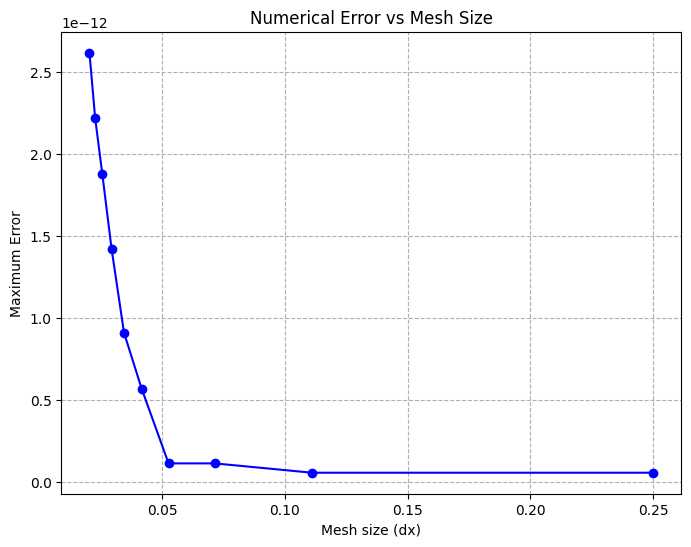

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the rod (m)
k = 45  # Thermal conductivity (W/m.K)
T_left = 300  # Temperature at x=0 (K)
T_right = 400  # Temperature at x=L (K)

# Analytical solution function for steady-state heat conduction
def analytical_solution(x):
    T = T_left + (T_right - T_left) * (x / L)
    return T

# Function to solve using finite difference method and TDMA
def TDMA(N):
    # Initialization of arrays
    D = np.zeros(N)  # Right-hand side vector (RHS)
    T = np.zeros(N)  # Temperature vector
    P = np.zeros(N)  # P vector for TDMA
    Q = np.zeros(N)  # Q vector for TDMA
    A = np.zeros((N, N))  # Coefficient matrix

    dx = L / (N - 1)  # Step size

    # Boundary conditions
    D[0] = T_left
    D[-1] = T_right

    # Construct the coefficient matrix for the finite difference scheme
    for i in range(1, N-1):
        A[i, i] = 2           # Main diagonal (b)
        A[i, i+1] = -1        # Upper diagonal (c)
        A[i, i-1] = -1        # Lower diagonal (a)

    A[0, 0] = 1  # Left boundary condition
    A[-1, -1] = 1  # Right boundary condition

    # Initialize P and Q
    P[0] = -A[0,1] / A[0,0]
    Q[0] = D[0] / A[0,0]

    # Forward sweep (TDMA)
    for i in range(1, N-1):
        denom = A[i, i] + A[i, i-1] * P[i-1]
        P[i] = (-A[i, i+1]) / denom
        Q[i] = (D[i] - A[i, i-1] * Q[i-1]) / denom

    # Backward substitution to compute the solution
    T[-1] = D[-1]  # Right boundary condition

    for i in range(N-2, 0, -1):
        T[i] = P[i] * T[i+1] + Q[i]

    # Left boundary condition (not needed since it's already set)
    T[0] = D[0]
    return T, dx

# Function to compute numerical error
def compute_error(N):
    T_numerical, dx = TDMA(N)
    x = np.linspace(0, L, N)
    T_analytical = analytical_solution(x)
    error = np.abs(T_analytical - T_numerical)
    max_error = np.max(error)
    return max_error, dx

# Arrays to store errors and mesh sizes
errors = []
mesh_sizes = []

# Test for 10 different mesh sizes
N_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for N in N_values:
    max_error, dx = compute_error(N)
    errors.append(max_error)
    mesh_sizes.append(dx)

# Plot the error vs mesh size
plt.figure(figsize=(8, 6))
plt.plot(mesh_sizes, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Mesh size (dx)')
plt.ylabel('Maximum Error')
plt.title('Numerical Error vs Mesh Size')
plt.grid(True, which="both", ls="--")
plt.show()

# **NON-UNIFORM GRID**


*******************************INPUT*******************************
1D Steady State Heat Conduction in a rod without heat generation

------------------------------------------------------------------
Please make sure all the inputs are in SI units

------------------------------------------------------------------
Temperature in Kelvin
Length in metres
------------------------------------------------------------------
Please enter the Boundary conditions:
length of the rod: 1
Number of grid points: 30
Temperature of left face: 300
Temperature of right face: 400

*******************************OUTPUT*******************************


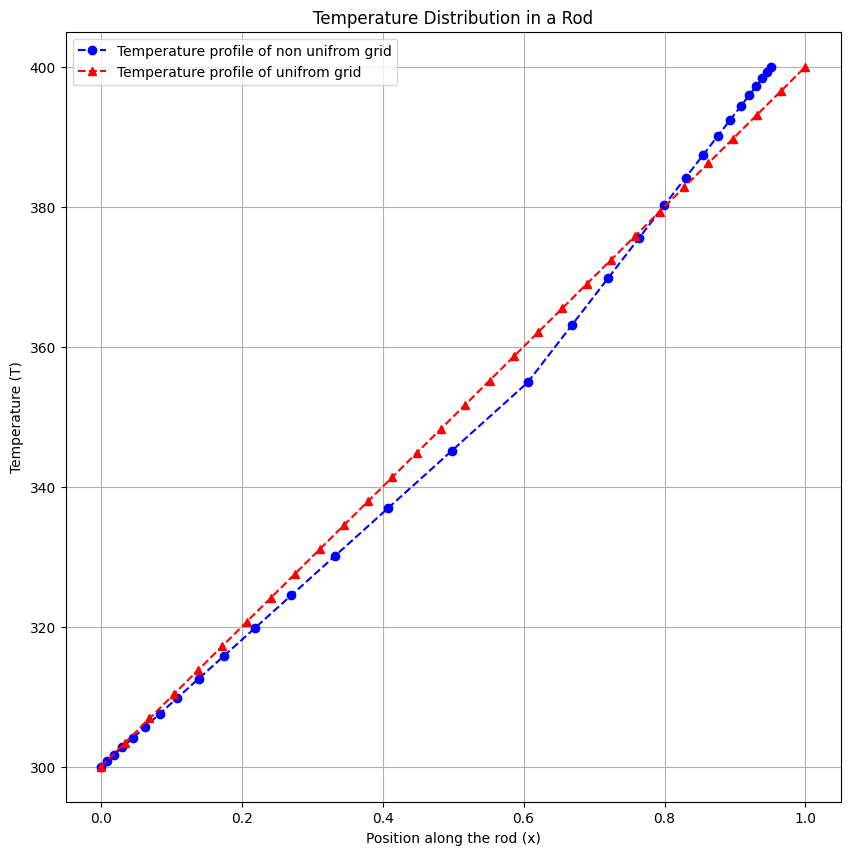

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#absolute function
def Absolute(A):
  for i in range(0,N):
    if A>0:
      A=A
    else:
      A=-1*A
  return A

#maximum error function
def Maximum_error(A,B):
  if B<A:
    B=A
  return B

#function to generate non uniform grid
def Non_uniform_grid(N,R):
  x=np.zeros(N)
  if N%2==0:
    Q=N//2
    for i in range(1,Q+1):
      x[i]=x[i-1]+(R**(i-1))*D
    for i in range(Q+1,N):
      x[i]=x[i-1]+((R**(Q-3))*D)/(R**(i-Q))
  else:
    Q=(N+1)//2
    for i in range(1,Q):
      x[i]=x[i-1]+(R**(i-1))*D
    for i in range(Q,N):
      x[i]=x[i-1]+((R**(Q-2))*D)/(R**(i-Q))
  return x[:]


#taking inputs from the user

print('\n*******************************INPUT*******************************')
print("1D Steady State Heat Conduction in a rod without heat generation\n")
print("------------------------------------------------------------------")
print("Please make sure all the inputs are in SI units\n")
print("------------------------------------------------------------------")
print("Temperature in Kelvin")
print("Length in metres")
print("------------------------------------------------------------------")
print('Please enter the Boundary conditions:')
L=int(input('length of the rod: '))
N=int(input('Number of grid points: '))
T_left=float(input('Temperature of left face: '))
T_right=float(input('Temperature of right face: '))

R=1.2
M=(N-1)/2
A=(((R**(M-1)-1)/(R-1))+(R**(M-1)/2))
D=float(A)
D=(L/(2*A))

x=np.zeros(N)
T=np.zeros(N)
T_old=np.zeros(N)
E=np.zeros(N)


x[:]=Non_uniform_grid(N,R)

T[0]=T_left
T[-1]=T_right

max_error=1
tolerance=0.000001

while max_error>tolerance:
  max_error=0
  if N%2==0:
    Q=N//2
    for i in range(1,Q):
      for i in range(1,Q):
        T[i]=(T[i+1]+R*T[i-1])/(1+R)
      for i in range(Q,N-1):
        T[i]=((R*T[i+1]+T[i-1])/(1+R))
      for i in range(1,N-1):
        E[i]=T[i]-T_old[i]
        E[i]=Absolute(E[i])
        max_error=Maximum_error(E[i],max_error)
  else:
    Q=(N+1)//2
    for i in range(1,Q):
      T[i]=(T[i+1]+R*T[i-1])/(1+R)
    for i in range(Q,N-1):
      T[i]=((R*T[i+1]+T[i-1])/(1+R))
    for i in range(1,N-1):
      E[i]=T[i]-T_old[i]
      E[i]=Absolute(E[i])
      max_error=Maximum_error(E[i],max_error)
  T_old[:]=T[:]


#uniform grid temperature profile
y=np.linspace(0,L,N)
C=np.zeros(N)
C_old=np.zeros(N)
H=np.zeros(N)

C[0]=T_left
C[-1]=T_right

max_error=1
tolerance=0.000001

while max_error>tolerance:
  max_error=0
  for i in range(1,N-1):
    C[i]=0.5*(C[i+1]+C[i-1])
    H[i]=C[i]-C_old[i]
    H[i]=Absolute(H[i])
    max_error=Maximum_error(H[i],max_error)
  C_old[:]=C[:]

print('\n*******************************OUTPUT*******************************')
plt.figure(figsize=(10,10))
plt.title('Temperature Distribution in a Rod')
plt.plot(x,T,'--',label='Temperature profile of non unifrom grid',color='b',marker='o')
plt.plot(y,C,'--',label='Temperature profile of unifrom grid',color='r',marker='^')
plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature (T)')
plt.grid()
plt.legend()
plt.show()

# **SUCCESSIVE OVER RELAXATION**

1D Steady State Heat Conduction in a rod without heat generation

------------------------------------------------------------------
Please make sure all the inputs are in SI units

------------------------------------------------------------------
Temperature in Kelvin
Length in meters
------------------------------------------------------------------
Enter the length of the material:1
Enter the number of grid points:30
Enter the temperature of left face:300
Enter the temperature of right face:400
Enter the value of alpha:1
Number of iteratons are:927


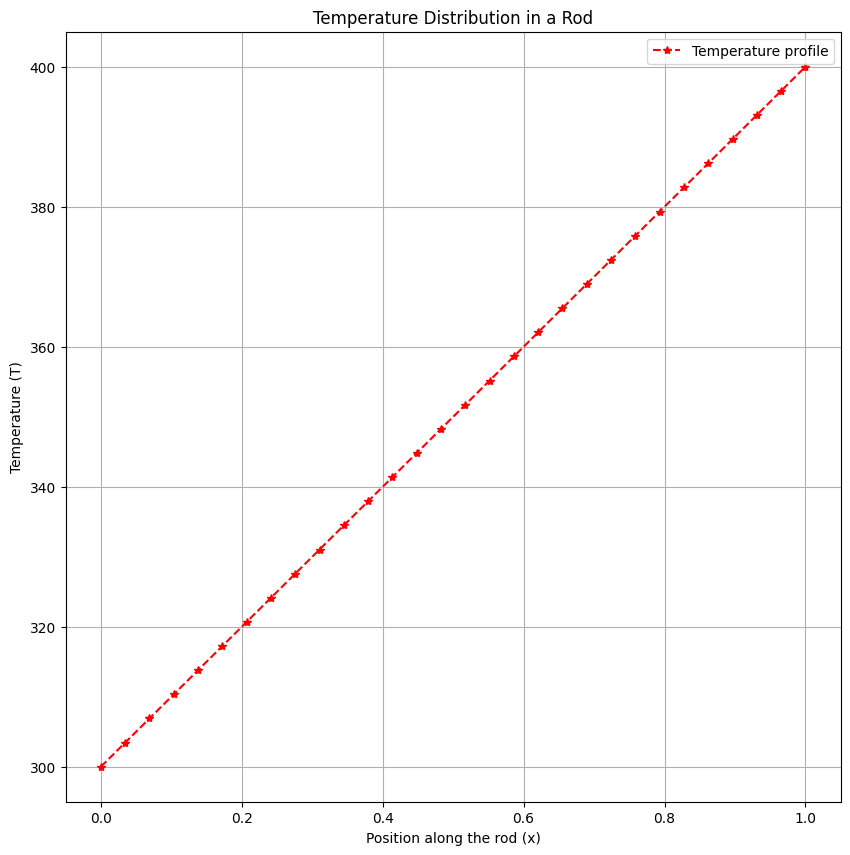

In [ ]:
#successive over relaxation
import numpy as np
import matplotlib.pyplot as plt
import math

#absolute function
def Absolute(A):
  for i in range(0,N):
    if A>0:
      A=A
    else:
      A=-1*A
  return A

#maximum error function
def Maximum_error(A,B):
  if B<A:
    B=A
  return B

print("1D Steady State Heat Conduction in a rod without heat generation\n")
print("------------------------------------------------------------------")
print("Please make sure all the inputs are in SI units\n")
print("------------------------------------------------------------------")
print("Temperature in Kelvin")
print("Length in meters")
print("------------------------------------------------------------------")
L=int(input('Enter the length of the material:'))
N=int(input('Enter the number of grid points:'))
T_left=int(input('Enter the temperature of left face:'))
T_right=int(input('Enter the temperature of right face:'))
a=float(input("Enter the value of alpha:"))

x=np.linspace(0,L,N)
T=np.zeros(N)
F=np.zeros(N)
E=np.zeros(N)
T_old=np.zeros(N)
A=np.zeros((N,N))

#creating a tridiagonal matrix from 2nd row to (n-1)th row beacuse we are using dirichlet boundary condition
for i in range(1,N-1):
  for j in range(0,N):
    if i==j:
      A[i,j]=2
    elif j==i+1:
      A[i,j]=-1
    elif j==i-1:
      A[i,j]=-1
    else:
      A[i,j]=0

#initialising 1st row 1st element and last row last element with one to satisfy LHS=RHS
A[0,0]=1
A[-1,-1]=1

T[0]=T_left
T[-1]=T_right
F[0]=T_left
F[-1]=T_right

count=0
m_e=1
tolerance=0.0001

while m_e>tolerance:
  m_e=0
  for i in range(1,N-1):
    sum=0
    for j in range(0,N):
      sum=sum+(A[i,j]*T[j])
    T[i]=T_old[i]+(a*(F[i]-sum))/A[i,i]
    E[i]=(T[i]-T_old[i])
    E[i]=Absolute(E[i])
    m_e=Maximum_error(E[i],m_e)
  count=count+1
  T_old[:]=T[:]

print('Number of iteratons are:{}'.format(count))
plt.figure(figsize=(10,10))
plt.title('Temperature Distribution in a Rod')
plt.plot(x,T,'--',label='Temperature profile',color='r',marker='*')
plt.xlabel('Position along the rod (x)')
plt.ylabel('Temperature (T)')
plt.grid()
plt.legend()
plt.show()


# **PART-2, TEMPERATURE DISTRIBUTION IN THE WALL**


*******************************INPUT*******************************
1D Steady State Heat Conduction in a rod without heat generation

------------------------------------------------------------------
Please make sure all the inputs are in SI units

------------------------------------------------------------------
Temperature in Degree centigrade
Length in meters
------------------------------------------------------------------
Please enter the Boundary conditions:
Length of the rod (L): 0.5
Number of grid points: 30
Rate of heat generation: 5e4
Convective heat transfer coefficient: 22
Thermal conductivity of material: 0.5
Temerature of fluid: 298

*******************************OUTPUT*******************************

 Surface temperature: 1434.3636363636363

 Maximum temperature in Gauss siedel method: 13919.499543774778

 Maximum temperature in Jacobi method: 13919.498690106491

 Maximum temperature in TDMA method: 13919.500378337454

 Number of iterations in Gauss-siedel method : 

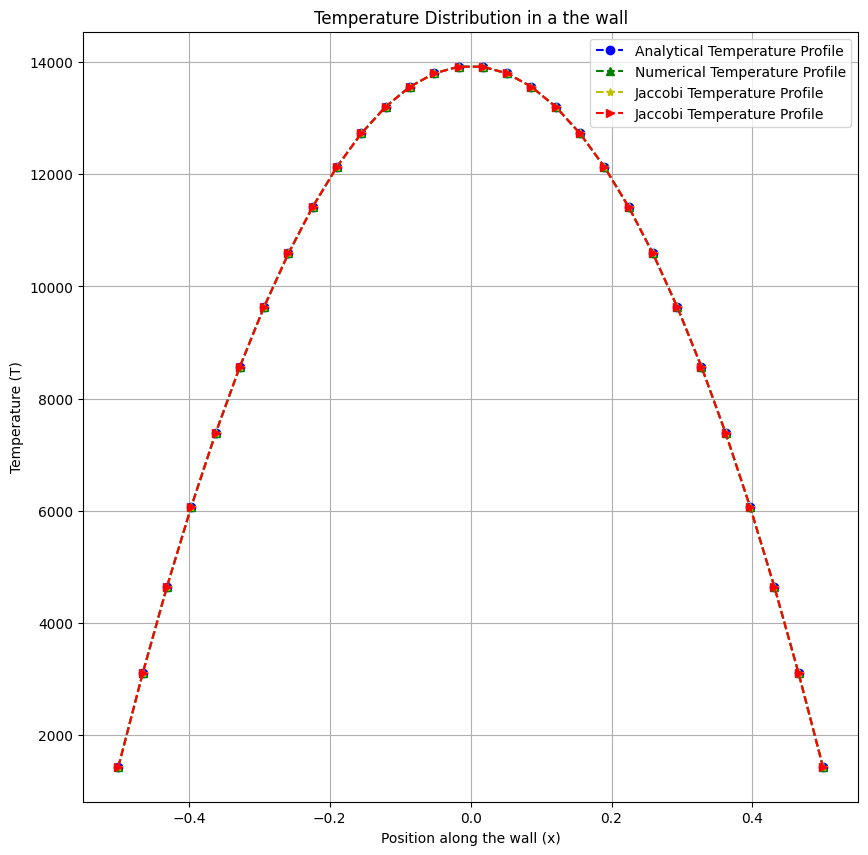

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#absolute function
def Absolute(A):
  for i in range(0,N):
    if A>0:
      A=A
    else:
      A=-1*A
  return A

#maximum error function
def Maximum_error(A,B):
  if B<A:
    B=A
  return B
#defining gauss siedel as a function
#start of function
def Gauss_Siedel(A,B,C,D):
  T=np.zeros(A)
  T_old=np.zeros(A)
  E=np.zeros(A)
  T[0]=B
  T[-1]=B
  count=0
  max_error=1
  tolerance=0.00001

  while max_error>tolerance:
    max_error=0
    for i in range(1,A-1):
      T[i]=(0.5*(T[i+1]+T[i-1]))+(((x[i]-x[i-1])**2)*C/(2*D))
      E[i]=T[i]-T_old[i]
      E[i]=Absolute(E[i])
      max_error=Maximum_error(E[i],max_error)
    T_old[:]=T[:]
    count=count+1
  return T_old[:],count
#end of function

#defining Jacobi as a function
#start of function
def Jaccobian(A,B,C,D):
  T=np.zeros(A)
  F=np.zeros(A)
  E=np.zeros(A)

  T[0]=B
  T[-1]=B
  F[0]=B
  F[-1]=B

  max_error=1
  tolerance=0.00001
  count=0
  while max_error>tolerance:
    max_error=0
    for i in range(1,A-1):
      F[i]=(0.5*(T[i+1]+T[i-1]))+(((x[i]-x[i-1])**2)*C/(2*D))
      E[i]=T[i]-F[i]
      E[i]=Absolute(E[i])
      max_error=Maximum_error(E[i],max_error)
    T[:]=F[:]
    count=count+1
  return T[:],count
#end of the function

#defining TDMA as a function
#start of the function
def TDMA(A,B,C,D):
  T=np.zeros(A)
  P=np.zeros(A)
  Q=np.zeros(A)
  F=np.zeros(A)
  R=np.zeros((A,A))

  T[0]=B
  T[-1]=B
  F[0]=B
  F[-1]=B

  for i in range(1,A-1):
    F[i]=-(C*((x[i]-x[i-1])**2))/(D) #calculating b, if we take our matrix in Ax=b form

  for i in range(1,A-1): #creating a tridiagonal matrix from 2nd row to (n-1)th row beacuse we are using dirichlet boundary condition
    for j in range(0,A):
      if i==j:
        R[i,j]=-2
      elif j==i+1:
        R[i,j]=1
      elif j==i-1:
        R[i,j]=1

  R[0,0]=1     #initialising 1st row 1st element and last row last element with one to satisfy LHS=RHS
  R[A-1,A-1]=1

  P[0]=-R[0,1]/R[0,0] #calculating P1 and Q1
  Q[0]=F[0]/R[0,0]

  for i in range(1,A-1):
    P[i]=-R[i,i+1]/(R[i,i]+(R[i,i-1]*P[i-1]))
    Q[i]=(F[i]-(R[i,i-1]*Q[i-1]))/(R[i,i]+(R[i,i-1]*P[i-1]))

  for i in range(2,A):
    T[-i]=P[-i]*T[-i+1]+Q[-i] #calculating Temperature from N-1th term
  return T[:]
#end of function

#taking inputs from the user

print('\n*******************************INPUT*******************************')
print("1D Steady State Heat Conduction in a rod without heat generation\n")
print("------------------------------------------------------------------")
print("Please make sure all the inputs are in SI units\n")
print("------------------------------------------------------------------")
print("Temperature in Degree centigrade")
print("Length in meters")
print("------------------------------------------------------------------")
print('Please enter the Boundary conditions:')
L=float(input('Length of the rod (L): '))
N=int(input('Number of grid points: '))
q=float(input('Rate of heat generation: '))
h=float(input('Convective heat transfer coefficient: '))
k=float(input('Thermal conductivity of material: '))
T_h=int(input('Temerature of fluid: '))

x=np.linspace(-L,L,N)
A=np.zeros(N)
T_s=T_h+((q*L)/h)#calculating surface temperature
T_m=T_s+(q*(L**2)/(2*k))#calculating maxium temperature

count1=0
Gauss=np.zeros(N)
Gauss[:],count1=Gauss_Siedel(N,T_s,q,k)#calling gauss function

count2=0
Jaccobi=np.zeros(N)
Jaccobi[:],count2=Jaccobian(N,T_s,q,k)#calling jacobi function

TD=np.zeros(N)
TD[:]=TDMA(N,T_s,q,k)#calling TDMA function

#Analytical results
for i in range(0,N):
  A[i]=(1-(x[i]/L)**2)*(T_m-T_s) + T_s



print('\n*******************************OUTPUT*******************************')
print('\n Surface temperature: {}'.format(T_s))
print('\n Maximum temperature in Gauss siedel method: {}'.format(max(Gauss)))
print('\n Maximum temperature in Jacobi method: {}'.format(max(Jaccobi)))
print('\n Maximum temperature in TDMA method: {}'.format(max(TD)))
print('\n Number of iterations in Gauss-siedel method : {}'.format(count1))
print('\n Number of iterations in Jacobi method : {} \n'.format(count2))
plt.figure(figsize=(10,10))
plt.title('Temperature Distribution in a the wall')
plt.plot(x,A,'--',label='Analytical Temperature Profile',color='b',marker='o')
plt.plot(x,Gauss,'--',label='Numerical Temperature Profile',color='g',marker='^')
plt.plot(x,Jaccobi,'--',label='Jaccobi Temperature Profile',color='y',marker='*')
plt.plot(x,TD,'--',label='Jaccobi Temperature Profile',color='r',marker='>')
plt.xlabel('Position along the wall (x)')
plt.ylabel('Temperature (T)')
plt.grid()
plt.legend()
plt.show()